<a href="https://colab.research.google.com/github/vanyanenkov/DL/blob/main/plt_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Множество точек

График разброса точек показывает как распределены данные на какой-то плоскости. Его можно использовать, например, для предварительного анализа признак на предмет наличия зависимости.

В библиотеке matplotlib за графики такого вида отвечает функция `plt.scatter()`, в качестве аргументов подаются массивы значений по оси х и по оси у.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

%matplotlib inline

np.random.seed(191)

In [ ]:
x=np.random.normal(size=1000)
y=np.random.normal(size=1000)

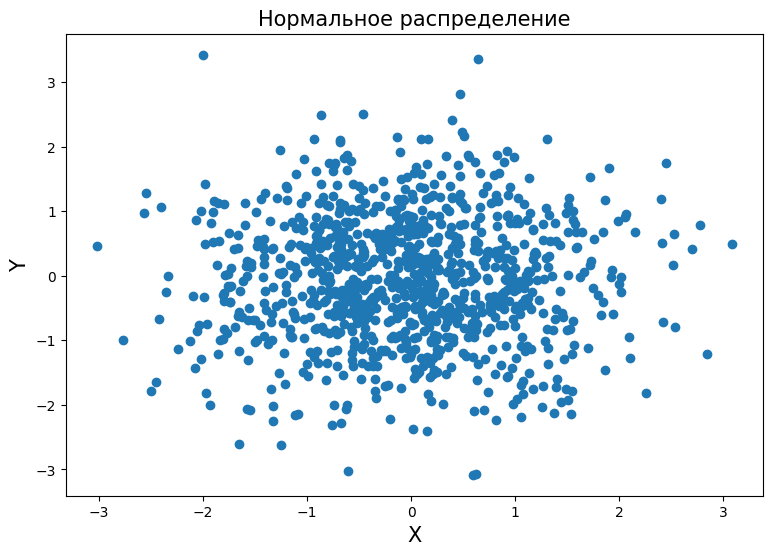

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(x, y)
plt.title('Нормальное распределение', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)

plt.show()

Аналогично маркерам на линейном графике, у точек можно регулировать следующие параметры:
- `s` отвечает за размер, это либо одно число для всех точек, либо массив чисел с размером для каждой из них.
- `marker` отвечает за тип точки, например, `'o'`, `'^'` или `'s'`, один и тот же внутри одно вызова функции.
- `color` или `c` отвечает за цвет, один для всех точек или для каждой свой.

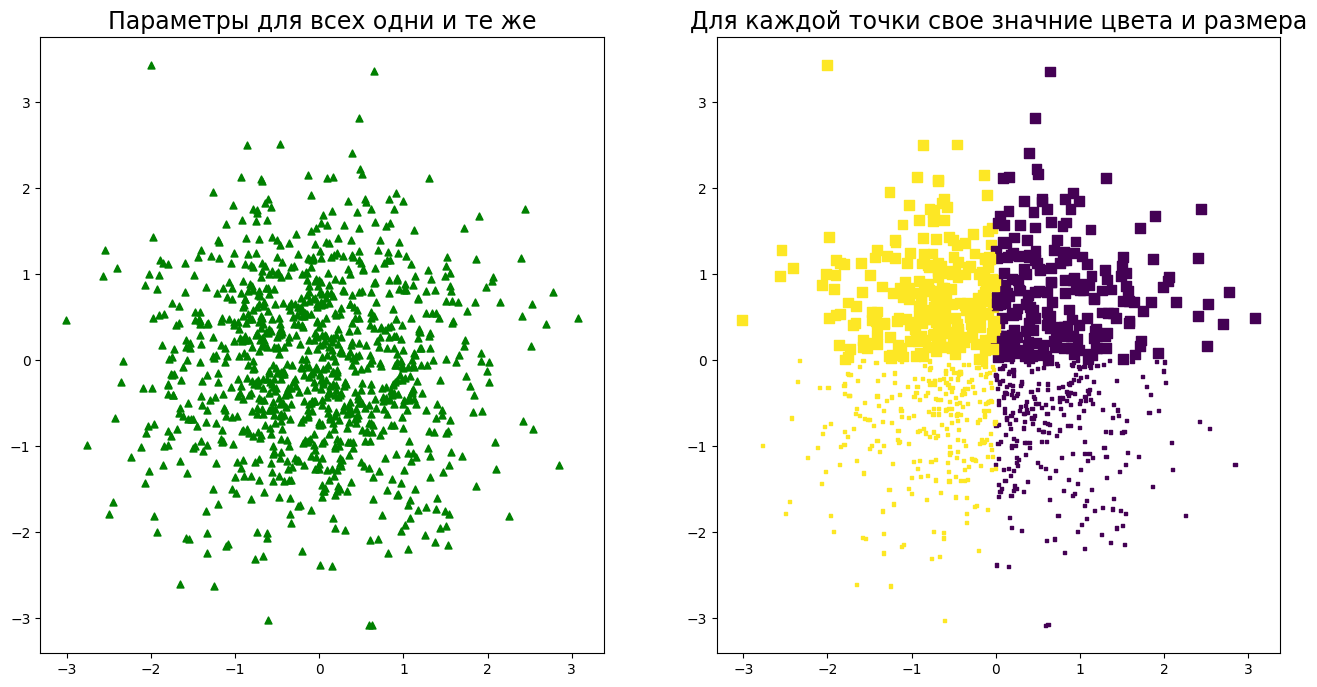

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)

plt.scatter(x, y, s=25, marker='^', color='green')
plt.title('Параметры для всех одни и те же', fontsize=17)

plt.subplot(1, 2, 2)
plt.scatter(x, y, s=[5 if y[i] < 0 else 50 for i in range(1000)],
            marker='s',
            c=(x < 0))
plt.title('Для каждой точки свое значние цвета и размера', fontsize=17)
plt.show()

## Расположение нескольких графиков рядом

Выше уже несколько раз использовалась функция `plt.subplots()`, пришло время поговорить про неё подробнее. Как было видно выше, она возволяет располагать несколько отдельных графиков на одном изображении.

### Коротко про Figure и Axis

Чтобы было понятнее, углубимся в то, как устроен вывод в matplotlib. Всё окно является объектом класса `Figure`, именно его размеры мы задаём параметром `figsize` в функции `plt.figure()`, которая этот объект создаёт. Уже в этой области располагаются объекты класса `Axis`, по умолчанию один, но может быть и несколько. Явно добавить его можно методом `add_subplot()`, указав в качестве аргумента три числа: количество строк, на которые нужно разделить область `Figure`, количество столбцов и номер фрагмента `Figure`, на котором мы хотим разместить область `Axis`. Нумерация начинается с 1 и движется слева направо, сверху вниз.

Ниже приведён пример, как создать `Figure` и `Axis` в явном виде. Чтобы показать различия между ними, мы закрасили их в разные цвета.

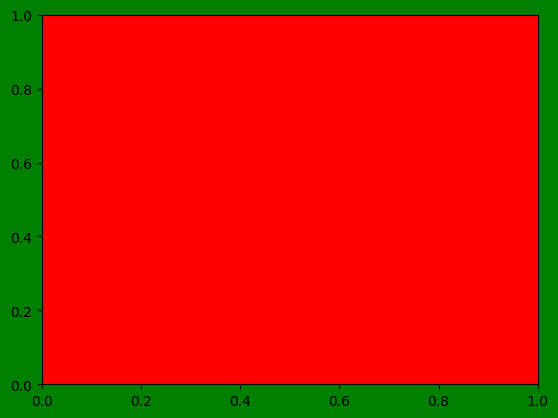

In [ ]:
fig=plt.figure()
ax= fig.add_subplot(1, 1, 1)

fig.set(facecolor='green')
ax.set(facecolor='red')

plt.show()

Все функции, которые мы выше вызывали как функции из модуля `plt`, могут выступать напрямую методами объекта класса `Axis`. Настройки самой области, такие как заголовок или подписи осей, передаются методами с приставкой `set_`: `set_title`, `set_xlabel` и т.д. Строить графики можно с помощью одноимённых методов: `ax.plot()`, `ax.scatter()` и др.

Построим так один из графиков выше.

In [ ]:
x=np.arange(7)
y1=np.array([3, 1, 2, 4, 5, 3, 4])
y2 = np.array([5, 4, 5, 3, 4, 2, 5])

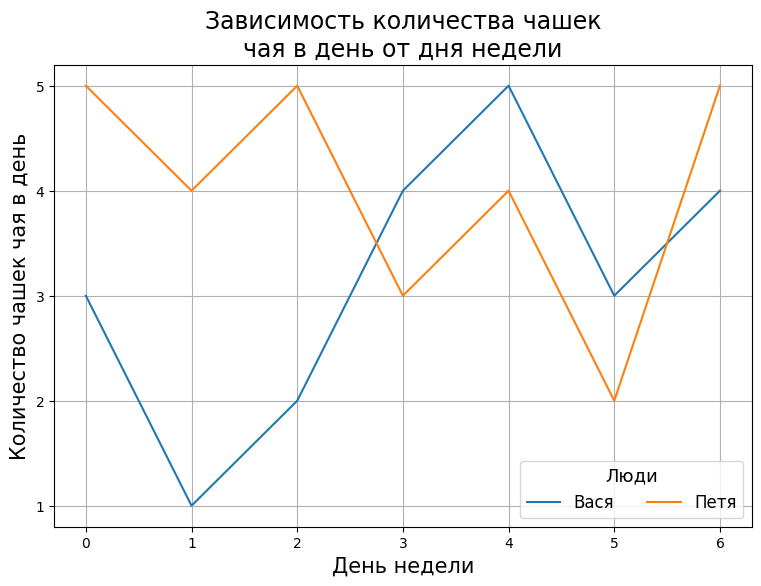

In [ ]:
fig=plt.figure(figsize=(9,6))
ax=fig.add_subplot(1,1,1)

ax.plot(x, y1, label='Вася')
ax.plot(x, y2, label='Петя')

ax.set_title('Зависимость количества чашек\nчая в день от дня недели', fontsize=17)

ax.set_xlabel('День недели', fontsize=15)
ax.set_ylabel('Количество чашек чая в день', fontsize=15)

ax.set_yticks(np.arange(1, 6))

ax.legend(title='Люди', title_fontsize=13, fontsize=12, ncol=2, loc='lower right')

ax.grid()

Добавлять заголовок можно не только для области `Axis`, но и для всей области `Figure`. Это бывает особенно актуальным для случая, когда рядом располагается несколько графиков. В matplotlib за это отвечает метод `fig.suptitle()`, на вход которому опять же подаётся строка с названием и при необходимости размер шрифта в качестве аргумента `fontsize`.

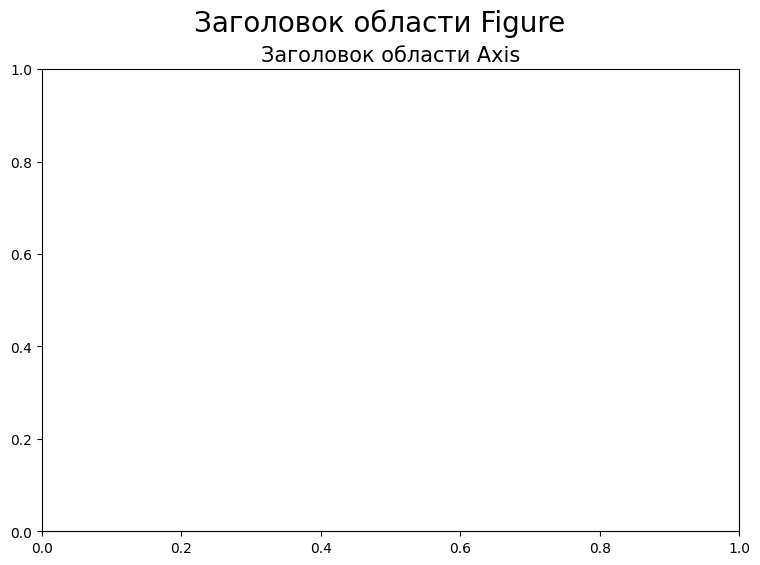

In [ ]:
fig=plt.figure(figsize=(9,6))
fig.suptitle('Заголовок области Figure', fontsize=20)

ax=fig.add_subplot(1,1,1)
ax.set_title('Заголовок области Axis', fontsize=15)
plt.show()


На одной и той же области `Figure` можно разместить несколько областей `Axis`. Для этого каждую из них добавляем функцией `add_subplot()`, увеличив количество строк и столбцов. Кстати, области `Axis` могут пересекаться.

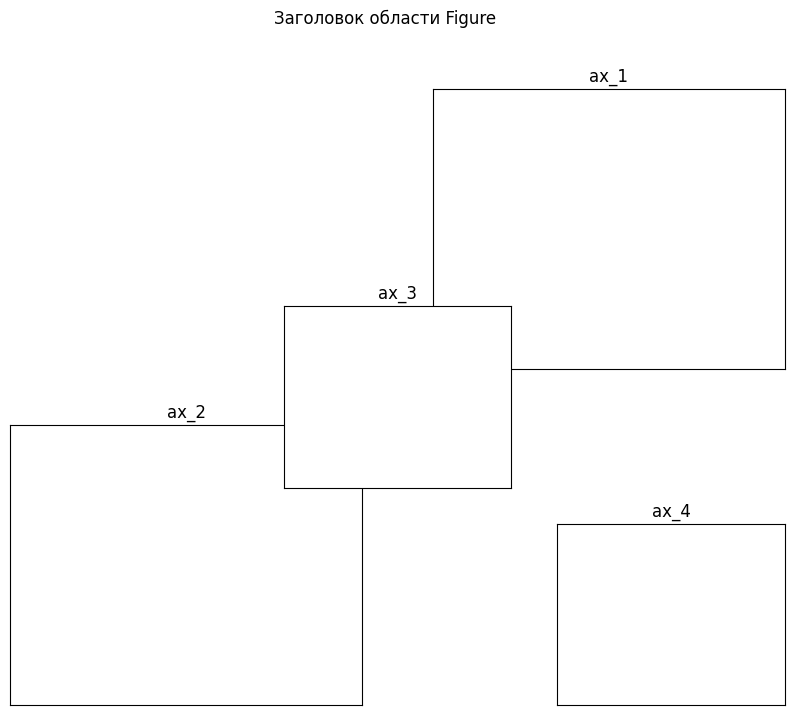

In [ ]:
fig = plt.figure(figsize = (10, 8))
fig.suptitle('Заголовок области Figure')

ax_1 = fig.add_subplot(2, 2, 2)
ax_2 = fig.add_subplot(2, 2, 3)
ax_3 = fig.add_subplot(3, 3, 5)
ax_4 = fig.add_subplot(3, 3, 9)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])

plt.show()

### Функция plt.subplots()

Но обычно всё же нужно расположить графики на какой-то регулярной сетке. Чтобы не добавлять для каждого область `Axis` отдельно, можно использовать функцию `plt.subplots()`. На вход она принимает количество строк и столбцов в сетке, также с помощью аргумента `figsize` можно задать размер области `Figure`. А возвращает эта функция объект класса `Figure` и массив объектов класса `Axis`, если их несколько, или же один такой объект. Массив будет двумерным, к каждой конкретной области можно будет обратиться просто по индексу.

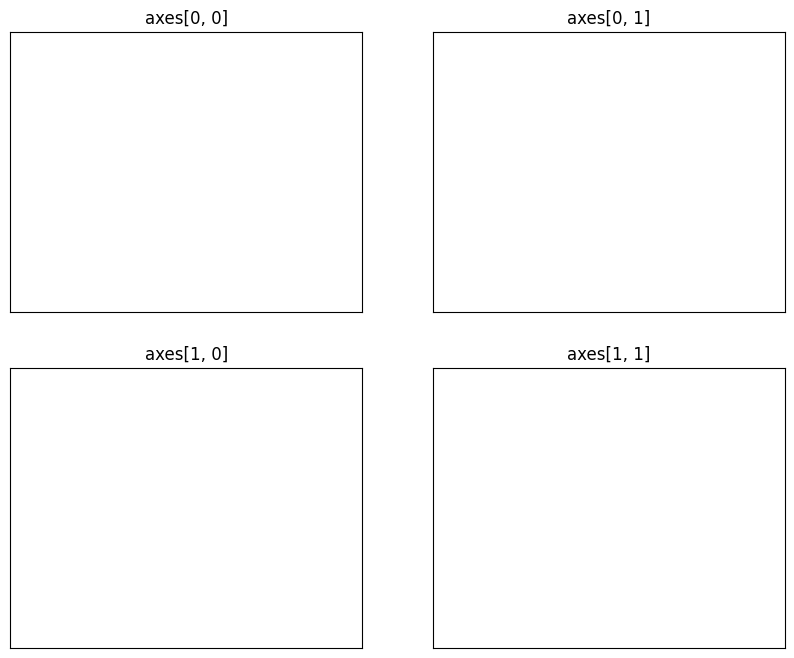

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].set(title='axes[0, 0]', xticks=[], yticks=[])
axes[0, 1].set(title='axes[0, 1]', xticks=[], yticks=[])
axes[1, 0].set(title='axes[1, 0]', xticks=[], yticks=[])
axes[1, 1].set(title='axes[1, 1]', xticks=[], yticks=[])

plt.show()

Если вдруг у нас для всех графиков в столбце или строке ось х или ось у одинаковые, можно не загромождать изображение их повторением и установить параметры `sharex` или `sharey` равными `True`.

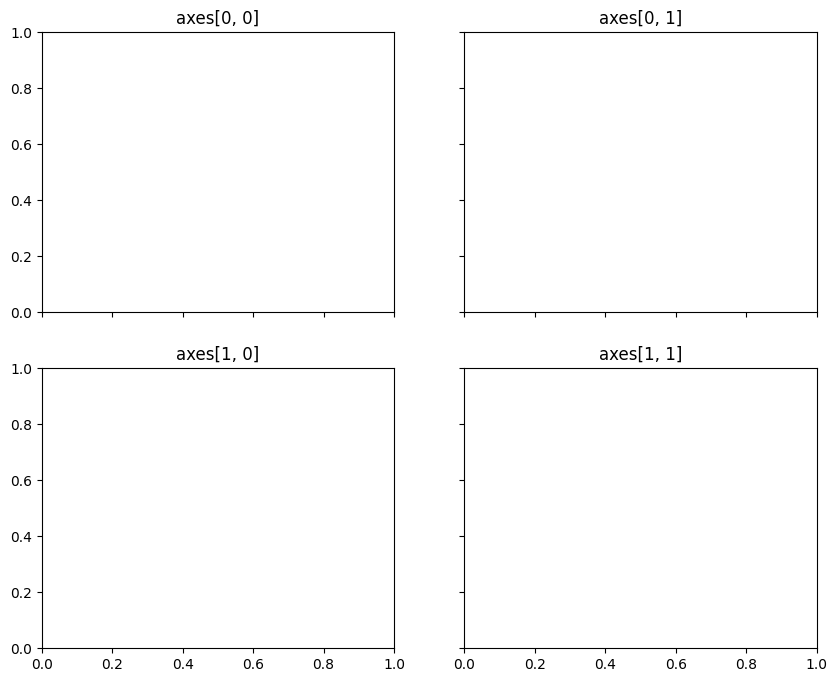

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

axes[0, 0].set(title='axes[0, 0]')
axes[0, 1].set(title='axes[0, 1]')
axes[1, 0].set(title='axes[1, 0]')
axes[1, 1].set(title='axes[1, 1]')

plt.show()

Ещё у объекта `ax` можно вообще отключить отображение осей методом `ax.axis()`, которому в качестве аргумента передали строку `'off'`. Это бывает полезно, когда мы хотим отобразить сетку из изображений.

Было:


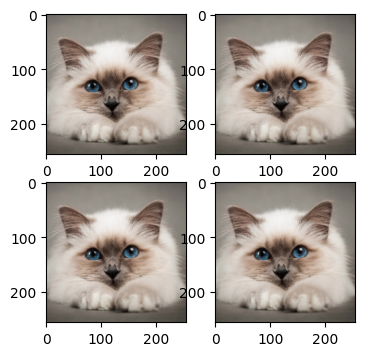

Стало:


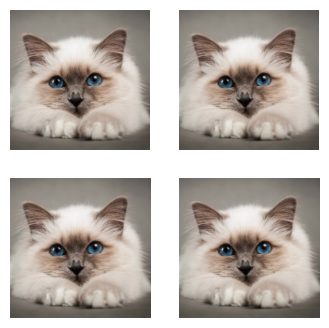

In [ ]:
!wget https://cs13.pikabu.ru/avatars/3128/x3128007-1508104989.png -O cat.png -q
image = plt.imread('cat.png')

print('Было:')
fig, axes = plt.subplots(2, 2, figsize=(4, 4))

axes[0, 0].imshow(image)
axes[0, 1].imshow(image)
axes[1, 0].imshow(image)
axes[1, 1].imshow(image)

plt.show()


print('Стало:')
fig, axes = plt.subplots(2, 2, figsize=(4, 4))

axes[0, 0].imshow(image)
axes[0, 0].axis('off')
axes[0, 1].imshow(image)
axes[0, 1].axis('off')
axes[1, 0].imshow(image)
axes[1, 0].axis('off')
axes[1, 1].imshow(image)
axes[1, 1].axis('off')

plt.show()

### Функция plt.subplot()

Если же нужно расположить рядом небольшое количество графиков и не хочется использовать довольно громоздкие `fig` и `ax`, можно воспользоваться более простой функцией — `plt.subplot()`. Она тоже на вход принимает количество строк и столбцов, но третьим числом передаётся номер области `Axis`, к которой будут относиться все последующие команды.

Эта функция тоже поддерживает нерегулярную сетку, но вот наложения областей `Axis` с помощью неё получить не удастся.

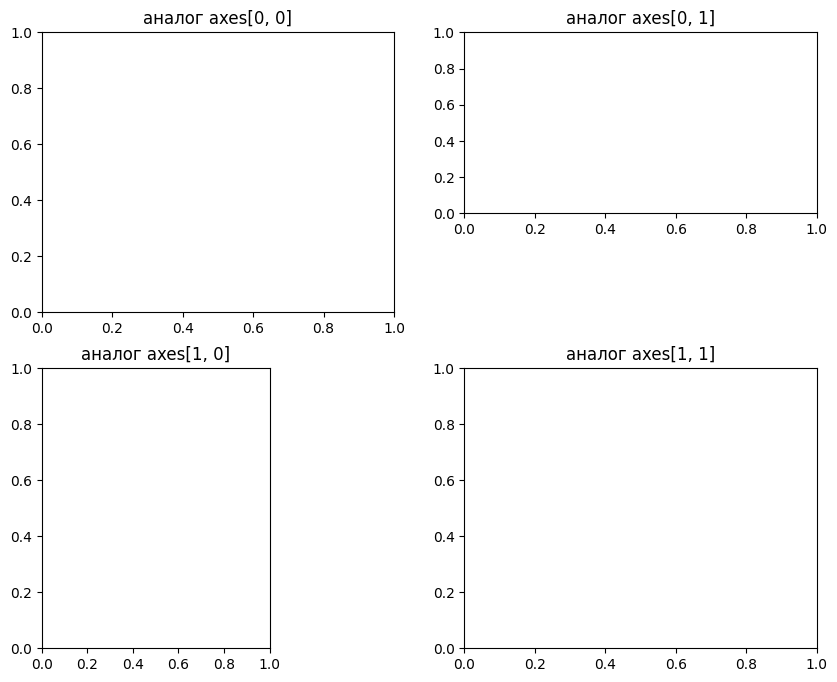

In [ ]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title('аналог axes[0, 0]')

plt.subplot(2, 2, 4)
plt.title('аналог axes[1, 1]')

plt.subplot(2, 3, 4)
plt.title('аналог axes[1, 0]')

plt.subplot(3, 2, 2)
plt.title('аналог axes[0, 1]')

plt.show()

## Кратко про более сложные виды графиков

С этого блока начнём знакомиться со второй анонсированной библиотекой для визуализации — seaborn (сокращают как sns). Она написана поверх matplotlib, но предлагает более высокоуровневый интерфейс. Благодаря этому можно быстрее строить самые распространённые графики. Также seaborn располагает большим количеством методов для визуализации статистических данных, некоторые из них мы разберём ниже.

### Некоторые возможности метода relplot

Первый метод из этой библиотеки, который мы разберём, — это `sns.relplot()`, включающий в себя множество очень разных графиков.

Сначала загрузим набор данных через `sns.load_dataset()`, для примера будем использовать датасет `tips`, содержащий следующую информацию:
- `total_bill` — общий счет, т.е. стоимость заказанной еды в долларах США (с учетом налогов);
- `tip` — размер чаевых в долларах США;
- `sex` — пол человека, который оплачивает счет;
- `smoker` — наличие курильщика среди участников одного заказа;
- `day` — день недели;
- `time` — время суток (lunch - первая половина дня, dinner - вторая половина дня);
- `size` — количество людей в группе, выполнившей один заказ.

In [ ]:
tips=sns.load_dataset('tips')
tips.head

<bound method NDFrame.head of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

В самой простой вариации `sns.relplot()` изображает график разброса точек в некоторой плоскости, признаки, соответствующие осям, указываются в аргументах `x` и `y`, параметр `data` указывает из какого набора данных брать значения.

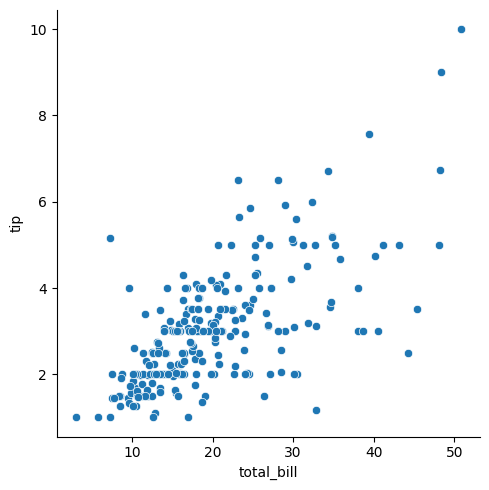

In [ ]:
sns.relplot(x='total_bill',
            y='tip',
            data=tips)

Цвет по умолчанию один и тот же для всех точек, но с помощью параметра `hue` можно указать признак, по которому для разных категорий будет использоваться разный цвет. Этот признак может быть как категориальным, так и числовым. Легенда по этому параметру создаётся автоматически, но может понадобиться аргумент `legend` указать равным `'full'`, чтобы в неё включались все значения числового признака.

Также с помощью `sns.relplot()` можно построить сразу несколько графиков. Для этого нужно указать в аргументе `col` или `row` признак, по которому нужно разделить данные и построить графики в разных колонках или строках соответственно.

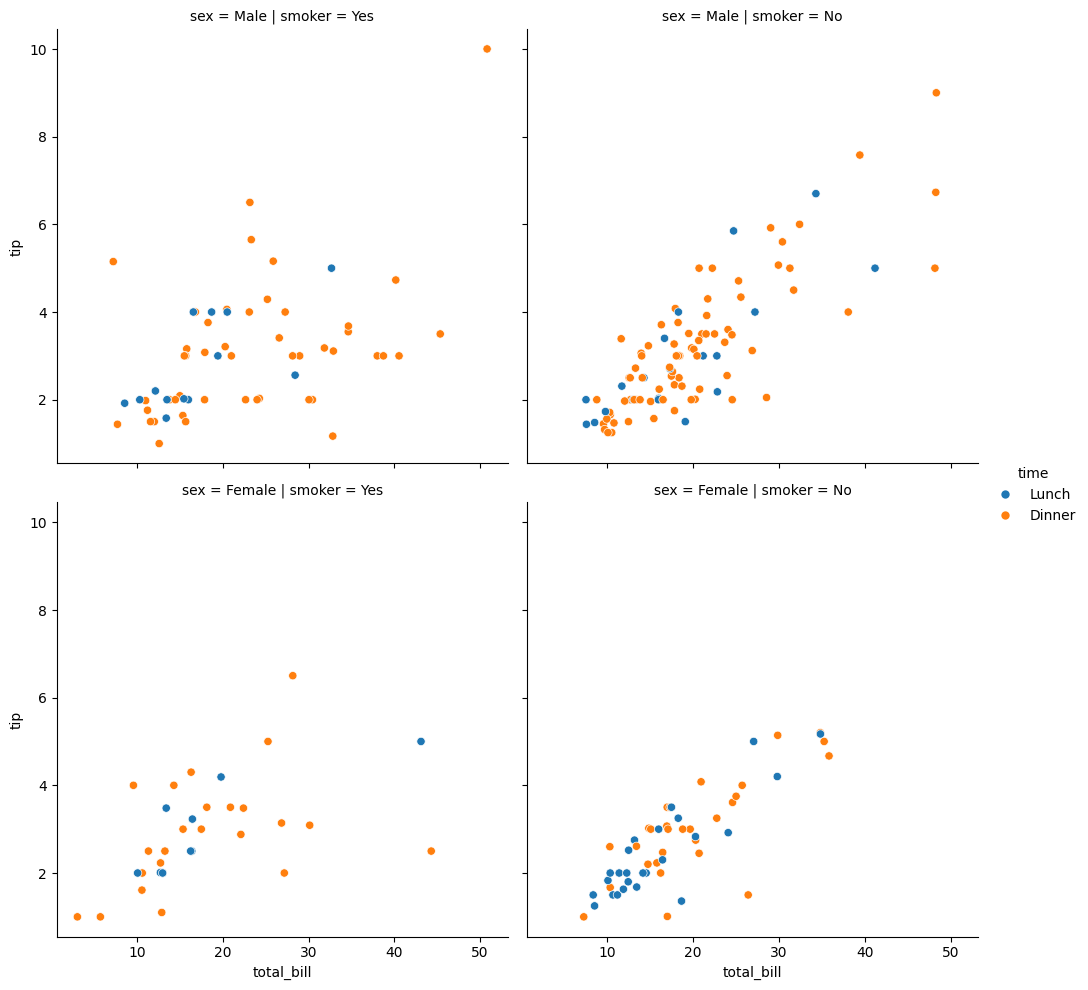

In [ ]:
sns.relplot(x='total_bill',
            y='tip',
            hue='time',
            col='smoker',
            row='sex',
            data=tips)

Другой тип графика, который можно построить с помощью `sns.relplot()`, — это линейный график. Чтобы его разобрать подробнее, загрузим набор данных `fmri` с результатами МРТ.

In [ ]:
fmri=sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


Посмотрим на данные в виде разброса точке

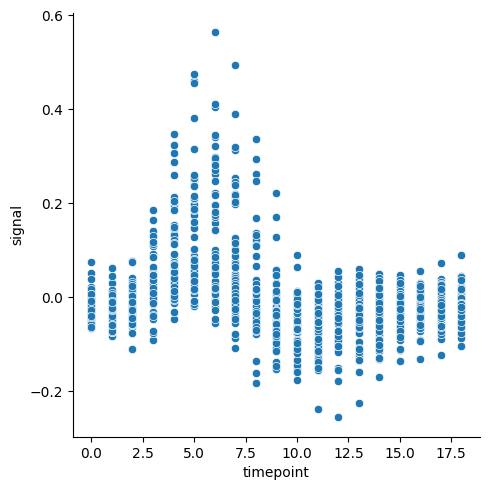

In [ ]:
sns.relplot(x='timepoint',
            y='signal',
            data=fmri)

Как мы видим, одним и тем же значениям из столбца `timepoint` соответствуют разные значения столбца `signal`. Можно воспринимать это как последовательность случайных величин и построить их статистическое распределение. Для этого линейный график в функции `sns.relplot()` отсортирует данные по точкам на оси х, найдёт среднее значение для каждой группы измерений и его 95%-й доверительный интервал. Чтобы указать, что мы хотим построить именно линейный график, нужно установить параметр `kind` равным `'line'`.

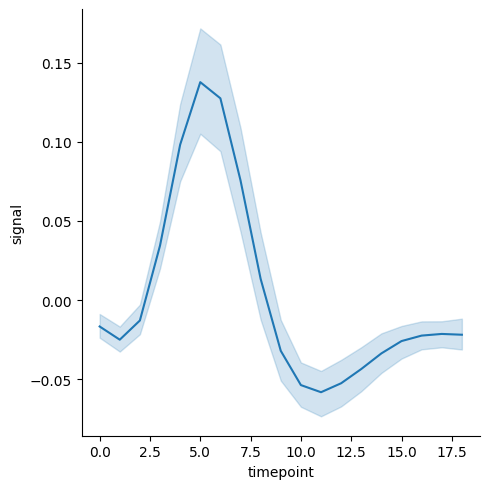

In [ ]:
sns.relplot(x='timepoint',
            y='signal',
            kind='line',
            data=fmri);

У такого линейного графика есть аргумент, позволяющий регулировать доверительный интервал. Это параметр `ci` и по умолчанию он равен 95, но можно установить его равным любому другому числу.

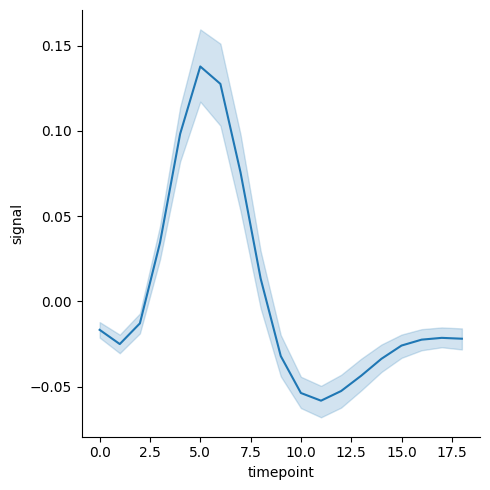

In [ ]:
sns.relplot(x='timepoint',
            y='signal',
            errorbar=('ci', 80),
            kind='line',
            data=fmri);

Также построение доверительного интервала можно отключить совсем, что соответствует значению `None` для аргумента `ci`.

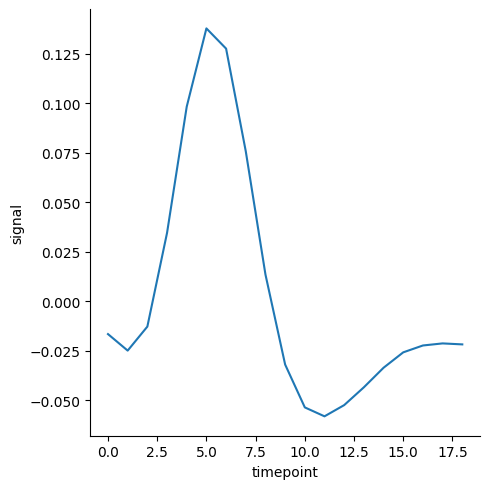

In [ ]:
sns.relplot(x='timepoint',
            y='signal',
            errorbar=None,
            kind='line',
            data=fmri);

Кроме того, вместо доверительного интервала можно указать на графике стандартное отклонение, установив параметр `ci` равным `'sd'`.

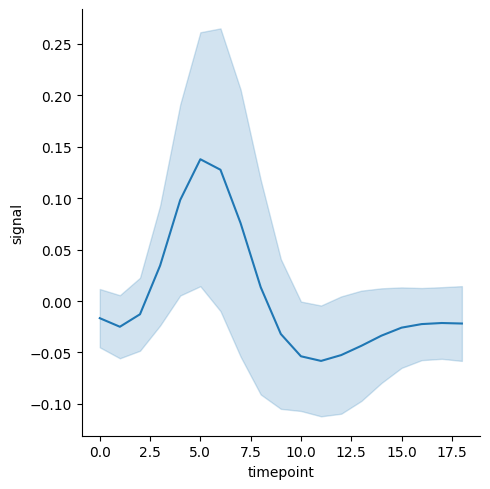

In [ ]:
sns.relplot(x='timepoint',
            y='signal',
            errorbar='sd',
            kind='line',
            data=fmri);

Аргументы `hue`, `row` и `col` здесь работают точно так же, как и для графика разброса точек.

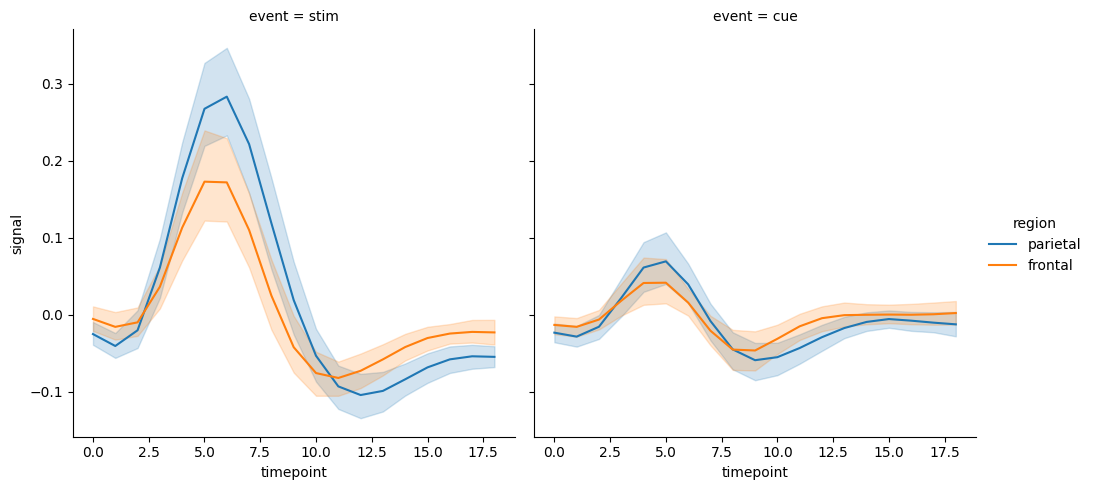

In [ ]:
sns.relplot(x='timepoint',
            y='signal',
            kind='line',
            hue='region',
            col='event',
            data=fmri)

Что касается размера графиков, как видно выше, метод его подбирает самостоятельно. Но при желании можно его поменять при помощи аргумента `height`, задающего высоту графика, и параметра `aspect`, указывающего соотношение сторон.

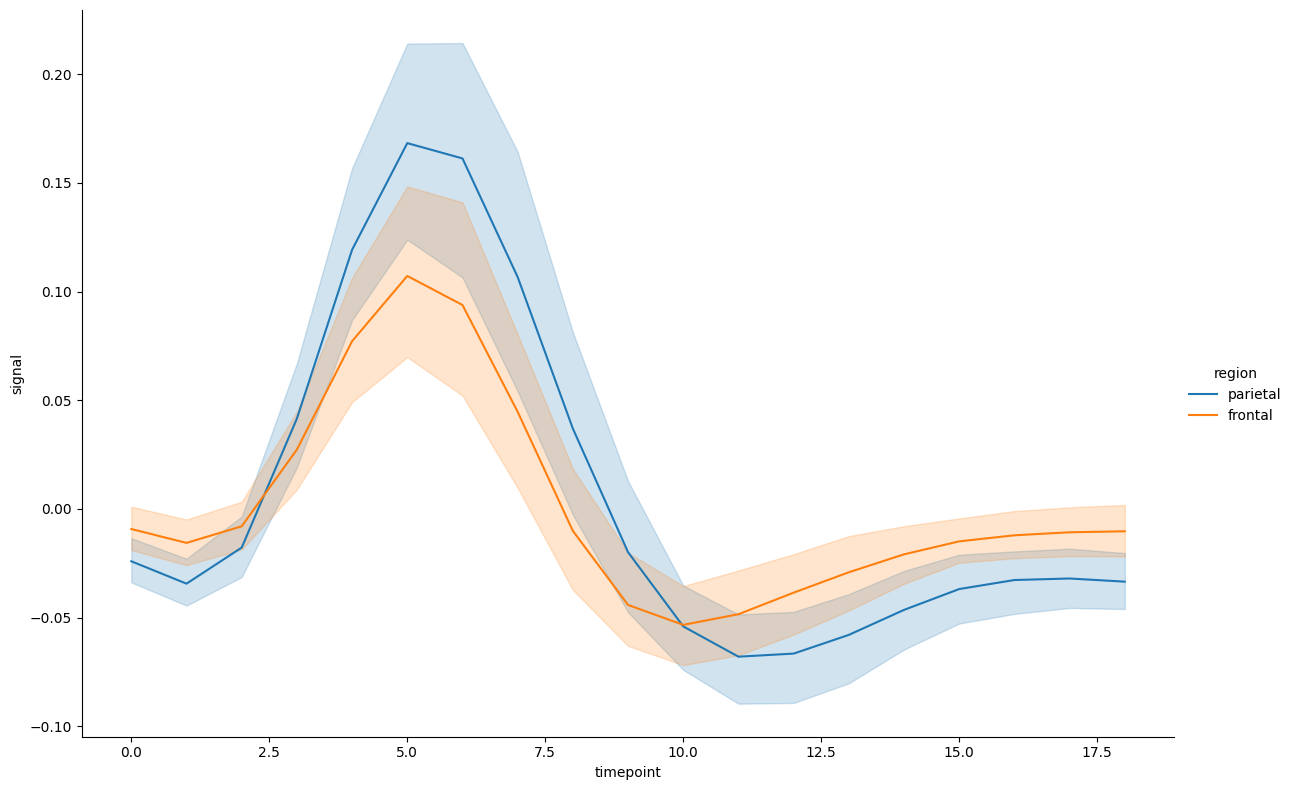

In [ ]:
sns.relplot(x='timepoint',
            y='signal',
            kind='line',
            hue='region',
            height=8,
            aspect=1.5,
            data=fmri);

### Heatmap

Heatmap -- это удобный способом визуализировать матрицу. Здесь по осям располагаются строки и столбцы матрицы, а значениям элементов соответствует цвет. Сами значения можно как писать поверх, так и не указывать вообще, если числовая точность не так важна.

Вернёмся к набору данных `tips`, но приведём его в виду двумерной матрицы в координатах дня и размера группы. Так мы смотрим зависимость чаевых только от этих двух параметров.

In [ ]:
ds = pd.pivot_table(data=tips, index='day', columns='size', values='tip')
ds

/tmp/ipython-input-2862715555.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ds = pd.pivot_table(data=tips, index='day', columns='size', values='tip')


size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


Для некоторых пар значение чаевых равняется `NaN` из-за отсутствия данных, но визуализации это не помешает.

Воспользуемся функцией `sns.heatmap()`, первым аргументом подаётся матрица значений. Основную часть параметров `sns` снова подберёт сам, но здесь можно подать в качестве аргумента `ax` объект типа `Axis`, на котором мы хотим построить нужный график.

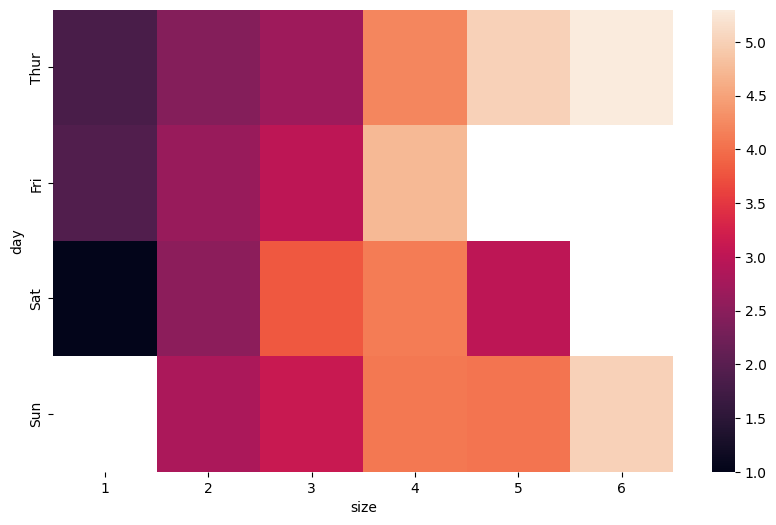

In [ ]:
fig = plt.figure(figsize=(10, 6))  # создаем фигуру
ax = fig.add_subplot(111)          # добавляем оси вручную
#аналог fig, ax = plt.subplots(figsize=(10, 6))
ax=sns.heatmap(ds, ax=ax)

Как видим, ячейкам со значением `NaN` соответствуют белые клетки. Остальные окрашены в соответствии со значениями, а перевод из цвета в числовой промежуток указан на шкале справа.

Также с помощью `ax` можно добавлять заголовок или менять подписи осей, как мы уже делали ранее. А значения для делений осей можно передавать напрямую в `sns.heatmap()` через аргументы `xticklabels` и `yticklabels` соответственно. Поворот для них метод подберёт так, чтобы они помещались, самостоятельно.

Text(95.62847222222221, 0.5, 'Размер группы')

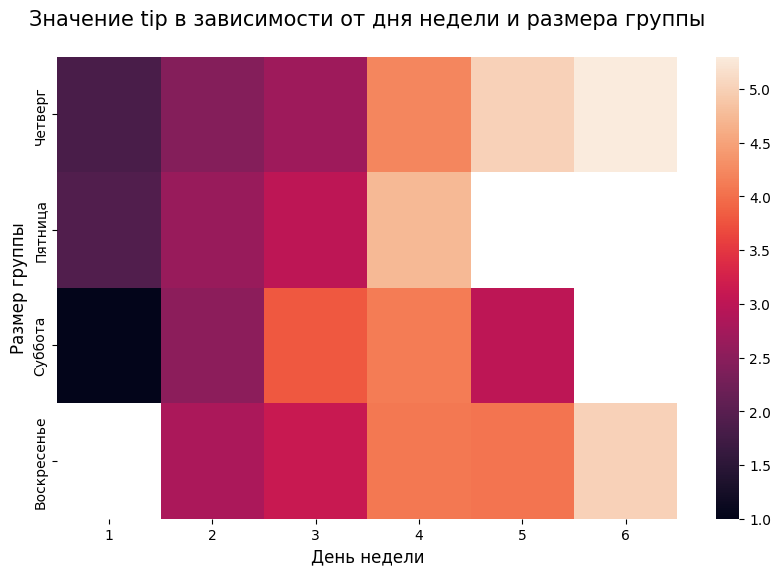

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(ds,
                 ax=ax,
                 yticklabels=['Четверг', 'Пятница', 'Суббота', 'Воскресенье'])

ax.set_title('Значение tip в зависимости от дня недели и размера группы\n', fontsize=15)
ax.set_xlabel('День недели', fontsize=12)
ax.set_ylabel('Размер группы', fontsize=12)

Но, пожалуй, в анализе `sns.heatmap` чаще всего используют для визуализации матрицы коррелиций между признаками. Чтобы показать, как это работает, сгенерируем некоторые случайные данные.

In [ ]:
t = np.linspace(0, 5, 200)* np.ones((7, 200)) + np.random.randn(7, 200).cumsum(axis=1)
a = np.array([0.5, 1, 2.1, -1.3, -0.1, 1.9, -2.9]).reshape(-1, 1)
b = np.array([-3, -4, -10, 4, 1, -5, 6]).reshape(-1, 1)

df = pd.DataFrame((a*t + b).T, columns=list('ABCDEFG'))


'''
np.linspace(0, 5, 200) — создает 200 точек от 0 до 5 (равномерно распределенных)

* np.ones((7, 200)) — превращает вектор в матрицу 7×200 (дублирует для каждой строки)

+ np.random.randn(7, 200).cumsum(axis=1) — добавляет случайное блуждание:

randn(7, 200) — нормальный шум (7 рядов по 200 точек)

.cumsum(axis=1) — кумулятивная сумма по горизонтали (временная ось)

Результат: матрица 7×200, где каждая строка — слегка зашумленная временная ось
'''

'''
a — угловые коэффициенты (наклоны) для каждого из 7 рядов

b — свободные члены (сдвиги) для каждого ряда

.reshape(-1, 1) — превращает в столбцы (7×1) для правильного умножения

3. Создание данных
python
(a*t + b)
Линейная модель: y = a*t + b

Умножение матриц: каждый ряд имеет свой наклон и сдвиг

Результат: матрица 7×200 с линейными трендами + случайное блуждание

4. Создание DataFrame
python
df = pd.DataFrame((a*t + b).T, columns=list('ABCDEFG'))
.T — транспонирование (200×7), так как в DataFrame строки — это наблюдения

columns=list('ABCDEFG') — 7 столбцов с именами A, B, C, D, E, F, G

'''

Посмотрим на них в формате линейного графика и попробуем предположить, какие из признаков сильно коррелируют друг с другом.

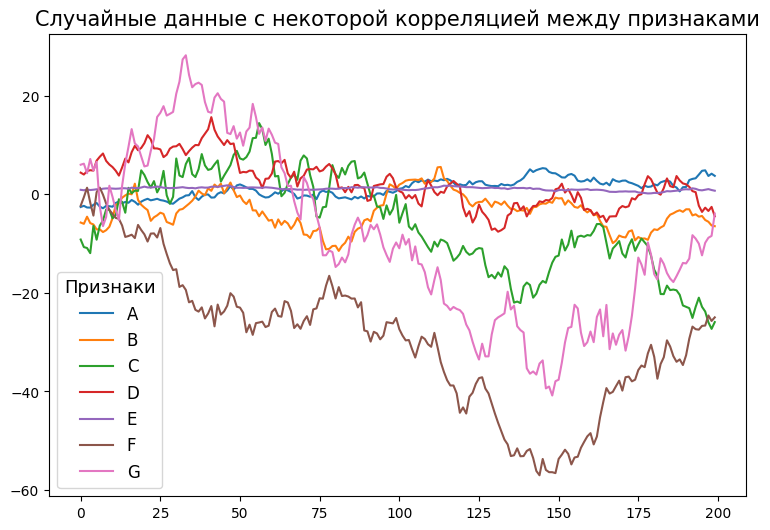

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(df.values)
plt.legend(labels=df.columns, title='Признаки', title_fontsize=13, fontsize=12)
plt.title('Случайные данные с некоторой корреляцией между признаками', fontsize=15)

plt.show()

Можно предположить, например, что признаки `F` и `C` довольно сильно коррелируют, но точно определить это на глаз довольно сложно, как и заметить менее наглядные корреляции. Поэтому построим тепловую карту для корреляционной матрицы.

Text(0.5, 1.0, 'Корреляционная матрица')

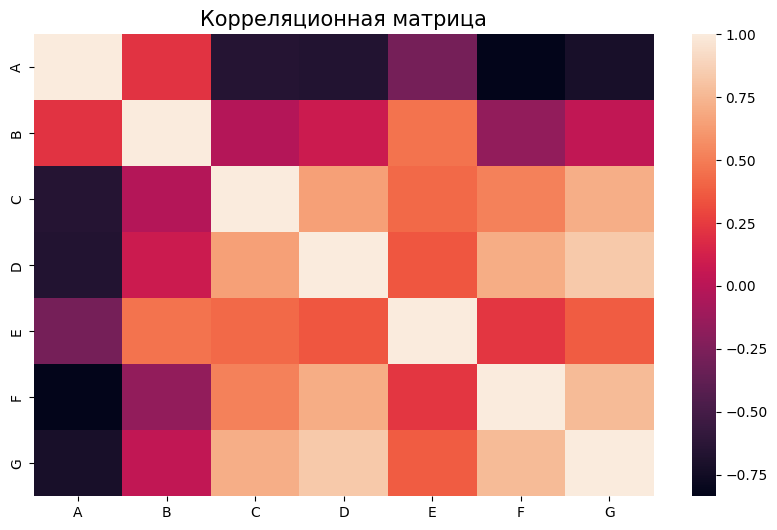

In [ ]:
fig, ax=plt.subplots(figsize=(10,6))
ax=sns.heatmap(data=df.corr(), ax=ax)
ax.set_title('Корреляционная матрица', fontsize=15)


Теперь по цвету можно сказать, что признак `B` довольно сильно коррелирует с `C` и `F`, но опять  же на глаз определить с каким из них сильнее довольно сложно. Именно поэтому `sns.heatmap()` может указывать значения из матрицы. Для этого нужно указать аргумент `annot` равным `True`.

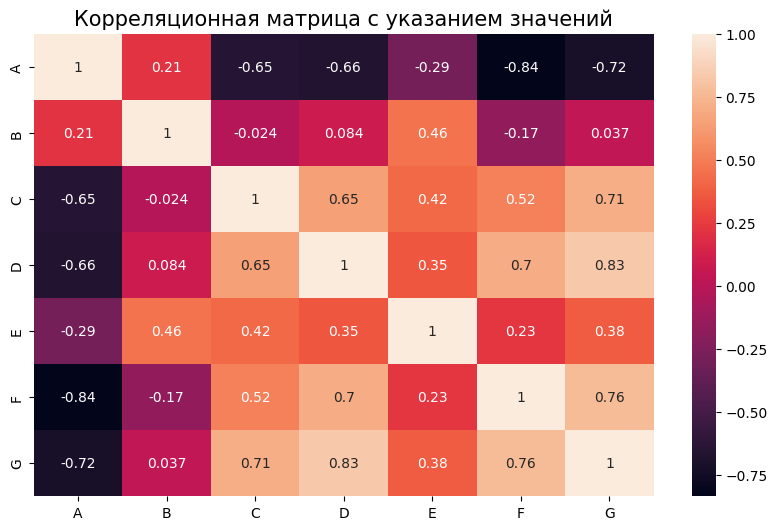

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(data=df.corr(), ax=ax, annot=True)
ax.set_title('Корреляционная матрица с указанием значений', fontsize=15);

Теперь мы уже точно можем выделить наиболее или наименее скоррелированные признаки и на основе этого продолжить предварительный анализ имеющихся данных.